# Desafio - Instruções

* Com o conjunto de dados sobre *câncer de mama*, utilize a célula seguinte com os dados carregados e divididos e **obtenha o melhor desempenho em um balanceamento das métricas**. 

* O modelo criado por você deverá ser *testado no conjunto de teste X_test e y_test*. 

* *O conjunto data_train e target_train poderá ser utilizado para escolher os melhores parâmetros e validar o modelo.*

* Organize e **tenha cuidado** para que seu experimento execute um *protocolo de validação que faça sentido*.

Mais informações sobre esse conjunto de dados poderão ser obtidas em: 
[https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset](http://)

In [13]:
# importando o dados
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
data = breast_cancer.data
target = breast_cancer.target

### HOULDOUT

In [14]:
# separando os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test_original, y_train, y_test_original = train_test_split(data, target, test_size=0.2, random_state=42)

# separando o conjunto de treino em validação também
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
# treinando o modelo 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# avaliando o modelo
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("Acurácia: ", accuracy_score(y_test, y_pred))

Acurácia:  0.945054945054945


In [16]:
from sklearn.metrics import classification_report

In [17]:
#Grid Searh - buscando o melhor parâmetro para o modelo

# analisando e verificando a melhor parametrização modelo, baseado no melhor valor de vizinho para KNN
best_model = None
best_accuracy = 0

for k in [1,2,3,4,5]:

    knn = KNeighborsClassifier(n_neighbors = k) # a cada passo, o parâmetro assume um valor
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('K:', k, '- ACC:', acc)
    
    if acc > best_accuracy:
        best_model = knn
        best_accuracy = acc
        
y_pred = best_model.predict(X_test_original)
acc = accuracy_score(y_test_original, y_pred)

print()
print('Melhor modelo:')
print('K:', best_model.get_params()['n_neighbors'], '- ACC:', acc * 100)

print(classification_report(y_test_original, y_pred))

K: 1 - ACC: 0.9340659340659341
K: 2 - ACC: 0.9230769230769231
K: 3 - ACC: 0.945054945054945
K: 4 - ACC: 0.9230769230769231
K: 5 - ACC: 0.945054945054945

Melhor modelo:
K: 3 - ACC: 92.10526315789474
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        43
           1       0.91      0.97      0.94        71

   micro avg       0.92      0.92      0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



### Validação cruzada
    ShuffleSplit

In [23]:
## UTILIZANDO O MELHOR MODELO NO GRID SEARCH

# embaralhando os dados várias vezes e re-executando o experimento

import numpy as np
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=best_model.get_params()['n_neighbors'], test_size=0.2, random_state=0) # 5 execuções diferentes com 20% dos dados para teste

acc = []
for train_index, test_index in ss.split(data):
    knn = KNeighborsClassifier(n_neighbors = best_model.get_params()['n_neighbors'])
    knn.fit(data[train_index],target[train_index])
    y_pred = knn.predict(data[test_index])
    acc.append(accuracy_score(y_pred,target[test_index]))

acc = np.asarray(acc) # converte pra numpy pra ficar mais simples de usar média e desvio padrão
print('Acurácia: %.2f +- %.2f' % (acc.mean() * 100, acc.std() * 100))

Acurácia: 91.23 +- 0.00


In [22]:
# embaralhando os dados várias vezes e re-executando o experimento

import numpy as np
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # 5 execuções diferentes com 20% dos dados para teste

acc = []
for train_index, test_index in ss.split(data):
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(data[train_index],target[train_index])
    y_pred = knn.predict(data[test_index])
    acc.append(accuracy_score(y_pred,target[test_index]))

acc = np.asarray(acc) # converte pra numpy pra ficar mais simples de usar média e desvio padrão
print('Acurácia: %.2f +- %.2f' % (acc.mean() * 100, acc.std() * 100))

Acurácia: 91.05 +- 1.16


### Validação cruzada
    cross_val_score

In [19]:
## UTILIZANDO O MELHOR MODELO NO GRID SEARCH

# utilizando validação cruzada com cross_val_score
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = best_model.get_params()['n_neighbors'])
scores = cross_val_score(knn, data, target, cv=5) # 5 execuções diferentes com 20% dos dados para teste

print('Acurácia: %.2f +- %.2f' % (scores.mean() * 100, scores.std() * 100))

Acurácia: 91.93 +- 2.39


In [24]:
# utilizando validação cruzada com cross_val_score
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 1)
scores = cross_val_score(knn, data, target, cv=5) # 5 execuções diferentes com 20% dos dados para teste

print('Acurácia: %.2f +- %.2f' % (scores.mean() * 100, scores.std() * 100))

Acurácia: 90.52 +- 2.33


### Validação cruzada
    KFold

In [20]:
## UTILIZANDO O MELHOR MODELO NO GRID SEARCH
# utilizando validação cruzada com KFold

from sklearn.model_selection import KFold
kf = KFold(n_splits = best_model.get_params()['n_neighbors'])

acc = []
for train_index, test_index in kf.split(data):
    knn = KNeighborsClassifier(n_neighbors = best_model.get_params()['n_neighbors'])
    knn.fit(data[train_index],target[train_index])
    y_pred = knn.predict(data[test_index])
    acc.append(accuracy_score(y_pred,target[test_index]))

acc = np.asarray(acc) # converte pra numpy pra ficar mais simples de usar média e desvio padrão
print('Acurácia: %.2f +- %.2f' % (acc.mean() * 100, acc.std() * 100))

Acurácia: 91.56 +- 2.15


In [25]:
# utilizando validação cruzada com KFold

from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)

acc = []
for train_index, test_index in kf.split(data):
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(data[train_index],target[train_index])
    y_pred = knn.predict(data[test_index])
    acc.append(accuracy_score(y_pred,target[test_index]))

acc = np.asarray(acc) # converte pra numpy pra ficar mais simples de usar média e desvio padrão
print('Acurácia: %.2f +- %.2f' % (acc.mean() * 100, acc.std() * 100))

Acurácia: 90.69 +- 3.44


### Validação cruzada
    StratifiedKFold

In [21]:
# utilizando validação cruzada com KFold estratificado

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits =  best_model.get_params()['n_neighbors'])

acc = []
for train_index, test_index in kf.split(data, target): # precisa passar as classes agora para que a divisão aconteça
    knn = KNeighborsClassifier(n_neighbors =  best_model.get_params()['n_neighbors'])
    knn.fit(data[train_index],target[train_index])
    y_pred = knn.predict(data[test_index])
    acc.append(accuracy_score(y_pred,target[test_index]))

acc = np.asarray(acc) # converte pra numpy pra ficar mais simples de usar média e desvio padrão
print('Accuracy - %.2f +- %.2f' % (acc.mean() * 100, acc.std() * 100))

Accuracy - 92.09 +- 2.40


In [26]:
# utilizando validação cruzada com KFold estratificado

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits =  5)

acc = []
for train_index, test_index in kf.split(data, target): # precisa passar as classes agora para que a divisão aconteça
    knn = KNeighborsClassifier(n_neighbors =  1)
    knn.fit(data[train_index],target[train_index])
    y_pred = knn.predict(data[test_index])
    acc.append(accuracy_score(y_pred,target[test_index]))

acc = np.asarray(acc) # converte pra numpy pra ficar mais simples de usar média e desvio padrão
print('Accuracy - %.2f +- %.2f' % (acc.mean() * 100, acc.std() * 100))

Accuracy - 90.52 +- 2.33


### visualizacao dos dados para entender a complexidade

Text(0.5, 1.0, 'PCA of Breast Cancer dataset')

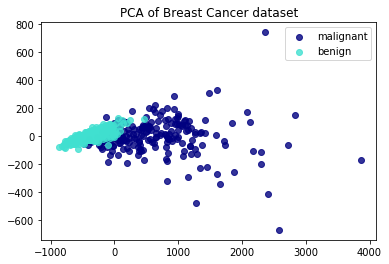

In [31]:
# visualizacao dos dados para entender a complexidade

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_r = pca.fit_transform(data)

colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], breast_cancer.target_names):
    plt.scatter(X_r[target == i, 0], X_r[target == i, 1], color=color, alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Breast Cancer dataset')

##### Resultado
    Para casos malignos existem resultados muito discrepantes (altos, semelhantes a outliears) o que pode dificultar a análise do modelo para as amostrar mais alglomerados. Uma boa solução para este caso é utilizar redução de dimensionalidade a aplicar as amostrar novamente, se possível em todos os casos ou pelo menos no melhor modelo com o melhor parâmetro e métrica realizada acima.

In [ ]:
### Continuação